# The DoWhy package provides several utilities for synthesizing data.
### Knowing how data is generated is a good starting point when learning a new methodology or algorithm.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import dowhy.datasets 

# Define auxiliary functions

In [5]:
def plot_gml(gml_graph):
    G = nx.parse_gml(gml_graph)
    pos=nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color="darkorange")
    return(plt.show())

In [6]:
def describe_synthetic_data(synthetic_data):
 if (synthetic_data['gml_graph'] != None) :
    plot_gml(synthetic_data["gml_graph"])                                               
 synthetic_data_df=synthetic_data["df"]
 #print(synthetic_data_df.head())
 print('------- Variables --------')
 print('Treatment vars:'      , synthetic_data['treatment_name'])
 print('Outcome vars:'        , synthetic_data['outcome_name'])
 print('Common causes vars:'  , synthetic_data['common_causes_names'])
 print('Instrument vars:'     , synthetic_data['instrument_names'])
 print('Effect Modifier vars:', synthetic_data['effect_modifier_names'])
 print('Frontdoor vars:'      , synthetic_data['frontdoor_variables_names'])
 print('Treatment vars:', synthetic_data['outcome_name'])
 print('-------- Corr -------')
 print(synthetic_data_df.corr())
 print('------- Head --------')
 return(synthetic_data_df)

# linear_dataset 

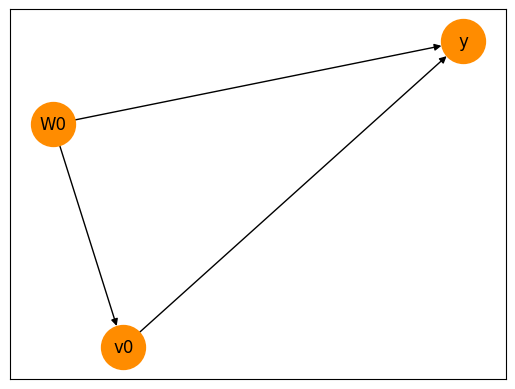

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0']
Instrument vars: []
Effect Modifier vars: []
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          W0        v0         y
W0  1.000000  0.805749  0.807357
v0  0.805749  1.000000  0.999996
y   0.807357  0.999996  1.000000
------- Head --------


,W0,v0,y
0,0.547850,True,100.110697
1,0.421110,True,100.097680
2,1.791209,True,100.374801
3,-0.470835,False,-0.086003
4,-1.705420,False,-0.375250


In [7]:
# create a dataset with 10 observations one binary treatment and a continous outcome affected by one common cause
synthetic_data = dowhy.datasets.linear_dataset(beta = 100,
                                               num_common_causes = 1,
                                               num_samples =10
                                               )
describe_synthetic_data(synthetic_data).head()

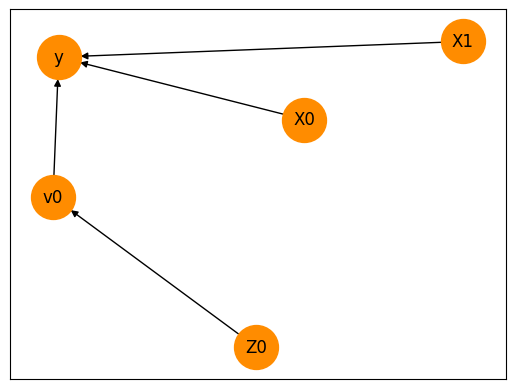

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: []
Instrument vars: ['Z0']
Effect Modifier vars: ['X0', 'X1']
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          X0        X1  Z0        v0         y
X0  1.000000  0.483121 NaN -0.145277  0.573129
X1  0.483121  1.000000 NaN  0.066401  0.993907
Z0       NaN       NaN NaN       NaN       NaN
v0 -0.145277  0.066401 NaN  1.000000  0.071774
y   0.573129  0.993907 NaN  0.071774  1.000000
------- Head --------


,X0,X1,Z0,v0,y
0,0.135059,0.823392,1.0,103.614029,13547.852883
1,-0.946448,-0.342117,1.0,104.838905,8641.343739
2,-0.198414,2.254356,1.0,105.542090,19117.635309
3,-2.093566,-0.364783,1.0,102.485680,7729.212003
4,0.949926,1.938450,1.0,103.721817,18234.812291


In [9]:
# Two continuos treatments, no common cause, an instrumental variable and two effect modifiers - linearly added appropriately
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   0,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   2, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   0,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   0,
                              num_discrete_instruments      =   0,
                              num_discrete_effect_modifiers =   0,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = False
                                               )
describe_synthetic_data(synthetic_data).head()

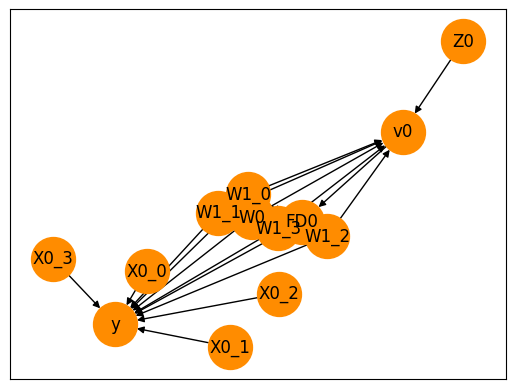

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0', 'W1_0', 'W1_1', 'W1_2', 'W1_3']
Instrument vars: ['Z0']
Effect Modifier vars: ['X0_0', 'X0_1', 'X0_2', 'X0_3']
Frontdoor vars: ['FD0']
Treatment vars: y
-------- Corr -------
           FD0      X0_0      X0_1      X0_2      X0_3  Z0        W0  \
FD0   1.000000 -0.206142  0.512791 -0.247309 -0.059340 NaN  0.945218   
X0_0 -0.206142  1.000000 -0.333333 -0.333333 -0.333333 NaN -0.214522   
X0_1  0.512791 -0.333333  1.000000 -0.333333 -0.333333 NaN  0.467414   
X0_2 -0.247309 -0.333333 -0.333333  1.000000 -0.333333 NaN -0.153136   
X0_3 -0.059340 -0.333333 -0.333333 -0.333333  1.000000 NaN -0.099756   
Z0         NaN       NaN       NaN       NaN       NaN NaN       NaN   
W0    0.945218 -0.214522  0.467414 -0.153136 -0.099756 NaN  1.000000   
W1_0 -0.025433 -0.066667 -0.066667  0.466667 -0.333333 NaN  0.087287   
W1_1 -0.489194  0.466667 -0.333333  0.200000 -0.333333 NaN -0.431564   
W1_2  0.2277

,FD0,X0_0,X0_1,X0_2,X0_3,Z0,W0,W1_0,W1_1,W1_2,W1_3,v0,y
0,1494.323217,0.0,1.0,0.0,0.0,0.0,0.889574,0.0,0.0,1.0,0.0,36.451306,24248.919342
1,-714.036240,0.0,0.0,1.0,0.0,0.0,-2.238382,0.0,1.0,0.0,0.0,-17.283692,-11696.009382
2,1060.426617,0.0,0.0,1.0,0.0,0.0,0.224291,1.0,0.0,0.0,0.0,25.942561,17320.268472
3,1805.852880,0.0,0.0,0.0,1.0,0.0,1.302723,0.0,0.0,1.0,0.0,44.000966,29402.827001
4,1077.017803,0.0,1.0,0.0,0.0,0.0,0.199523,1.0,0.0,0.0,0.0,26.290183,17462.275732


In [10]:
# Hot Encoding
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   2,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   1, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   1,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   1, #of the total num_common_causes
                              num_discrete_instruments      =   1,
                              num_discrete_effect_modifiers =   1,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = True
                                               )
describe_synthetic_data(synthetic_data).head()